![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)
# Part 3: EDA + Preliminary Analysis : Progress Report
**Predicting Electric Vehicle(EV) chargepoints in England)**

## Approach

The EDA approach will be to investigate:
1. The target variable (EV chargepoints) and how it is distributed across England spatially and by location category.
2. The proposed features and how they are distributed (normal, skew etc)
3. Outliers that exist and attempt to address them
4. Correlation between the features and the target variable

**Definitions:**<br>
`EV charge point/charging unit` – a single upstand or wall-mounted structure offering one or more socket outlets or tethered plugs suitable for charging EVs.

`EV charging station` – a physical site with at least one charge point installed suitable for charging at least two EVs. A station usually (but not always) has other physical structures accompanying the charge point(s) such as an energy supply enclosure (feeder pillar), weather shelter, signage, protection barriers for the equipment.

`Middle Layer Super Output Areas (MSOA)` are geographic areas in the UK with a minimum population of 5,000 and a mean is 7,200.

## Initial Results & Descriptive Analysis

### What type of places will I find an EV charging stations in England? How many chargepoints will there be?
1. There were **3,225 EV charging stations** locations distributed across England
2. Total amount of EV charge points were about **9,219**.
3. **EV charging stations** tend to be located predominatedly in **car parks**, on the **street** or at **service stations** in England<br>
4. There are about **2 - 3 charge points** on average per location for **car parks, service stations and on the street**<br>
5. **97.2% of charge points** are operational
><font color='blue' font size=4pt>*Overall EV charge points are predominately located in car parking lots and street parking and have high operability*</font>

### How are charge points distributed across England?
1. There are **6,791 MSOAs** distributed across England
2. **1,581** of these areas have at least 1 charger (representing **23.3%**)
3. The remaining **5,210** areas have no electric vehicle charger (representing **76.7%**)<br>

><font color='blue' font size=4pt>*Overall EV charge points are sparsely distributed across the country.*</font>

<table>
    <tr>
        <td><img src='../reports/figures/EVchargepoints_dist.jpg'><figcaption><b>Figure 1a</b></figcaption></td>
        <td><img src='../reports/figures/EVlocation_chart.jpg'><figcaption><b>Figure 1b</b></figcaption></td>
    </tr>
</table><br>

### Do the features in the dataset have considerable variance, are they normally distributed?

1. 4.5% of feature variables (11) approached a normal distribution based on a skew criterion of within $+-0.5$ and a kurtosis criterion of +-3.
2. The remaining 95.5% had positively skewed distributions
3. 15% of feature variables (36) were positively skewed with good kurtosis
4. The `cycle_to_work` feature had a distribution most similar to the number of EV chargepoints
5. Most variables therefore had substantial amount of outliers
><font color='blue' font size=4pt>*The distribution of feature variables are mostly positively skewed with only 5% being normally distributed; Significant outliers in the variables exist*</font>

### Which features are most correlated to the number of EV charge points?

The features most related to the number of EV charge points in the various domains were as follows:

>**Socio-Economic:** *Working age population size and barriers to housing*<br> 
`workingage_pop`(0.223), `16_59_pop`(0.218) and `widerbar_score`(0.153) 

>**Transportation:** *Number of journeys by bus to social events, work and shopping; carpools to employers business*<br>
`carpassenger_to_empbus_nhb`(0.446),`buscoach_to_social_nhb`(0.445),<br>`buscoach_from_work`(0.441),`buscoach_to_shopping_nhb`      (0.440)  

>**Car Ownership:** *No car ownership and EV car ownership for first quarter 2019 and 3rd quarter 2018*<br>
`no_car`(0.221),`2019_q1`(0.133),`2018_q3`(0.133)


>**Geo-spatial:** *Number of car parking lots, train stations and gas/service stations*<br>
`num_parking`(0.380),`num_train_st`(0.284),`num_gas_st`(0.171)

>**Electricity Consumption:** *Non-domestic electiricty consumption rates and the number of domestic and non-domestic electricity meters*<br>
`elec_nd_con`(0.381),`nd_meters`(0.340),`d_meters`(0.187)

><font color='blue' font size=4pt>*There is weak correlation between most features with transportation features showing the best correlations*</font>

<table>
    <tr>
        <td><img src='../reports/figures/EVcorrheatmap.jpg'><figcaption><b>Figure 1c</b></figcaption></td>
    </tr>
</table><br>

## Roadblocks, Setbacks, Surprises & Next Steps

### Roadblocks
1. Weak linear correlations with the number of EV charge points in an area; This may require the limitation of modelling to a classification approach with a focus on the use of non-linear models (tree ensembles,boosting, bagging, knn etc)

2. Having the exact figures for EV car registrations per MSOA. This information is very hard to come by. An estimation based on EV ownership per local authority was used as a gauge for EV car registrations per MSOA

### Surprises
1. EV car ownership had a weak correlation to the number of EV charge points in an area
2. Non-domestic electricity consumption in an area is highly correlated to the number of journeys people make by any mode to  do shopping, attend social events or conduct employers business!

### Next Steps
1. Model EV chargepoint estimation using a classification approach; Attempt to transform variables that have a skewed distribution.
2. Focus on precision in the model given the sparse distribution of EV charge points accross the country (uneven class weighting). If this model is ultimately geared towards identifying areas that should have chargepoints for future public/private investment, having a high precision is critical.
3. Utilize  logistic regression after transformation or use an ensemble or KNN modeling approach due to non-linearity.

## Limitations

Estimates based on EV ownership per local authority were made; actual figures were not used

## Visual analysis

In [3]:
# Importing all needed packages
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

#from __future__ import print_function


# Importing prepared dataframe with chargepoint information (features and target)
df = pd.read_csv("../data/interim/msoa/full_dataset_msoa.csv")

df.loc[:, 'elec_d_con':'elec_nd_con_mdn'] = df.loc[:,
                                                   'elec_d_con':'elec_nd_con_mdn'].apply(lambda x: abs(x))

In [ ]:
chargepoints = pd.read_csv("../csv/lsoa/chargers_db_updated.csv")

In [51]:
# Importing chargepoint information based on file "charge_point_mapping.ipynb"
chargepoints = pd.read_csv("../csv/lsoa/chargers_db_updated.csv")
chargepoints.chargepoint_type = chargepoints.chargepoint_type.apply(lambda x: 'Car_Park' if x == 'Parking' else x)

### EV charge point analysis
#### Summary
**EV charge point/charging unit** – a single upstand or wall-mounted structure offering one or more socket outlets or tethered plugs suitable for charging EVs.

**EV charging station** – a physical site with at least one charge point installed suitable for charging at least two EVs. A station usually (but not always) has other physical structures accompanying the charge point(s) such as an energy supply enclosure (feeder pillar), weather shelter, signage, protection barriers for the equipment.

> 1. There were **3,225 EV charging stations** locations distributed across England
> 2. Total amount of EV charge points were about **9,219**.
> 3. **EV charging stations** tend to be located predominatedly in **car parks**, on the **street** or at **service stations** in England<br>
> 4. There are about **2 - 3 chargers** on average per location for **car parks, service stations and on the street**<br>
#### Statistics on the number of chargepoint locations, number of chargers per location and percentage of operational chargers

In [52]:
more_chargers = chargepoints[chargepoints.title.notna(
)].drop_duplicates().reset_index(drop=True)
print(
    f"Total number of EV charging station locations: {more_chargers.shape[0]} ")
print(
    f"Total number of EV charge points: {more_chargers.chargepoints.sum():.0f} ")
print(
    f"EV charge points per location: {more_chargers.chargepoints.sum()/more_chargers.shape[0]:.0f} ")
print(
    f"% of EV charge points operable: {more_chargers.operable.value_counts(normalize=True)[1]*100:.1f}")

Total number of EV charging station locations: 3225 
Total number of EV charge points: 9219 
EV charge points per location: 3 
% of EV charge points operable: 97.2


#### Calculating the most EV charge points per category location

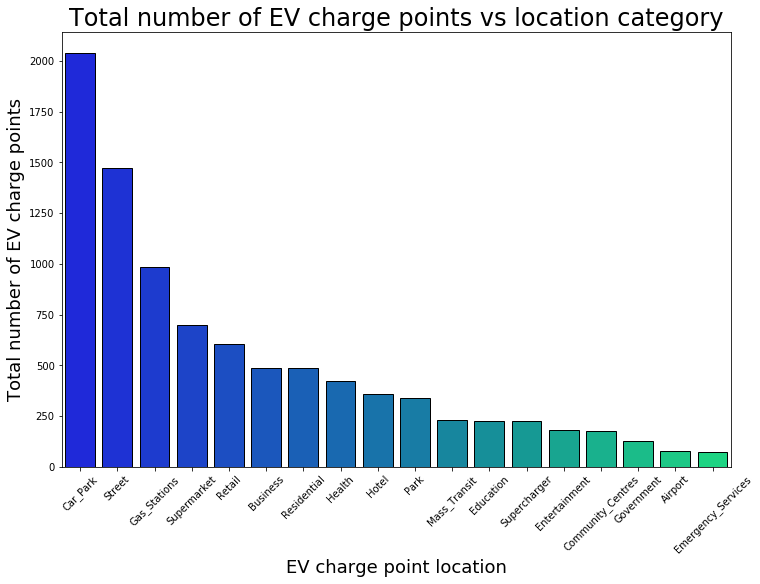

In [53]:
most_chargepoints = chargepoints.groupby(
    'chargepoint_type').agg({'chargepoints': 'sum'})
most_chargepoints = most_chargepoints.sort_values(
    by='chargepoints', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='chargepoint_type', y='chargepoints', estimator=sum, data=chargepoints,
            order=most_chargepoints.index, ci=None, orient='v', palette='winter', ec='k', ax=ax)
ax.set_title(
    "Total number of EV charge points vs location category", fontsize=24)
ax.set_xlabel("EV charge point location", fontsize=18)
ax.set_ylabel("Total number of EV charge points", fontsize=18)
plt.xticks(rotation=45)

plt.savefig("../reports/figures/EVlocation_chart.jpg")

#### Calculating the average EV charge points per category location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

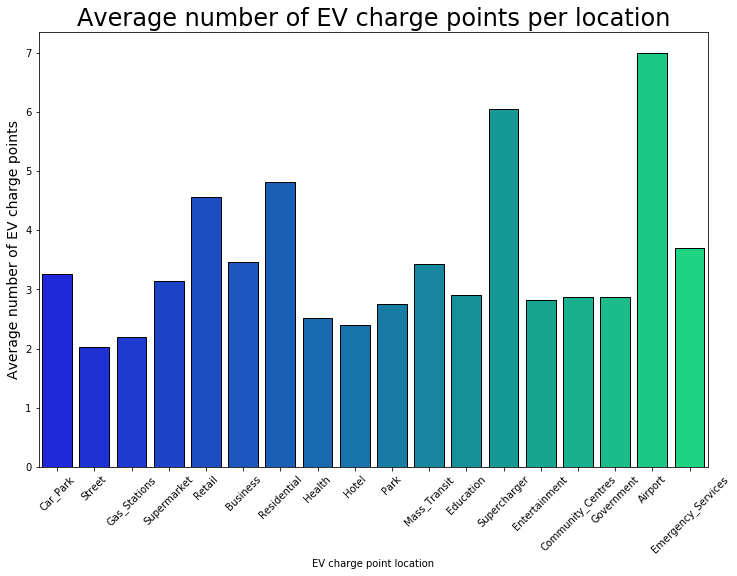

In [54]:
most_chargepoints_per_location = chargepoints.groupby(
    'chargepoint_type').agg({'chargepoints': 'mean'})
most_chargepoints_per_location = most_chargepoints_per_location.sort_values(
    by='chargepoints', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='chargepoint_type', y='chargepoints', data=chargepoints,
            order=most_chargepoints.index, ci=None, orient='v', palette='winter', ec='k', ax=ax)
ax.set_title("Average number of EV charge points per location", fontsize=24)
ax.set_xlabel("EV charge point location")
ax.set_ylabel("Average number of EV charge points", fontsize=14)
plt.xticks(rotation=45)

### EV charge point distribution per Middle Layer Super Output Area
#### Summary
**Middle Layer Super Output Areas (MSOA)** are geographic areas in the UK with a minimum population of 5,000 and a mean is 7,200.

> 1. There are **6,791 MSOAs** distributed across England
> 2. **3,012** of these areas have at least 1 charger (representing **44.4%**)
> 3. The remaining **3,779** areas have no electric vehicle charger (representing **55.6%**)<br>

The distribution of the number EV charge points across england is skewed towards zero from the histograms displayed below

In [10]:
print(f"Total number of MSOAs in England: {df.charge_points.shape[0]}")
print(
    f"Number of MSOAs in England that have at least 1 charger: {df.charge_points.apply(lambda x : x>0).sum()}")
print(f"{df.charge_points.apply(lambda x : x>0).mean()*100:.1f} % of MSOAs have at least 1 charger")
print(f"{100 - df.charge_points.apply(lambda x : x>0).mean()*100:.1f} % of MSOAs have no electric vehicle charger")

Total number of MSOAs in England: 6791
Number of MSOAs in England that have at least 1 charger: 3010
44.3 % of MSOAs have at least 1 charger
55.7 % of MSOAs have no electric vehicle charger


In [11]:
def plot_chargept_hist(target, bins, color, **kwarg):

    fig, ax = plt.subplots(figsize=(12, 4))

    sns.distplot(df[target], bins=bins, kde=False,
                 hist_kws=dict(ec='k'), color=color)
    ax.set_title(kwarg['title'], fontsize=24)
    ax.set_xlabel(kwarg['xlabel'], fontsize=14)
    ax.set_ylabel("Number of MSOAs", fontsize=14)
    ax.set_yscale('log')
    ax.set_xlim(0,)
    return plt.show()

In [12]:
# Introducing both cubic transformation and log transformation of target variable

df['charge_pt_cbrt'] = np.cbrt(df.charge_points)
#df['charge_pt_log'] = PowerTransformer('yeo-johnson').fit_transform(df.charge_points.values.reshape(-1,1))
df['charge_pt_log'] = np.log1p(df.charge_points)

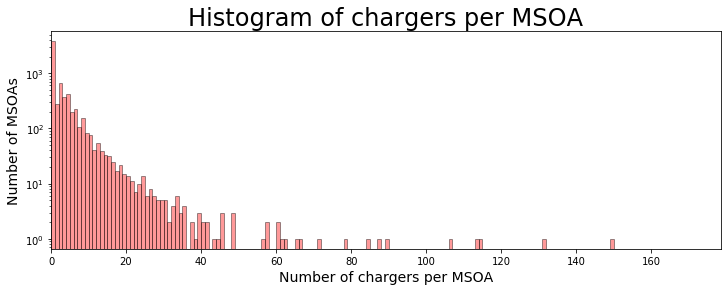

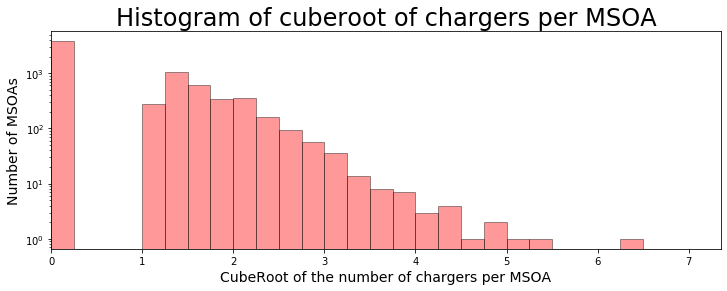

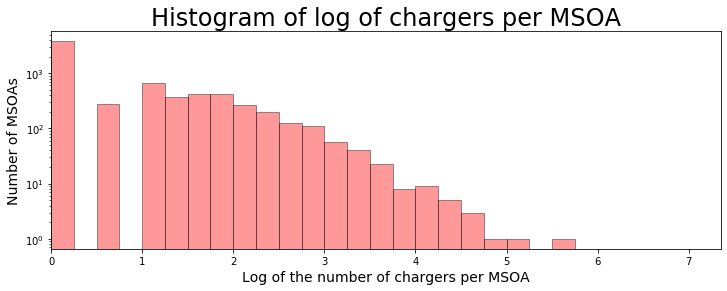

In [13]:
# Plotting the Chargepoint distribution per medium super output area (MSOA)
plot_chargept_hist('charge_points', np.linspace(0, 170, 171), 'r',
                   title='Histogram of chargers per MSOA', xlabel='Number of chargers per MSOA')
plot_chargept_hist('charge_pt_cbrt', np.linspace(0, 7, 29), 'r',
                   title='Histogram of cuberoot of chargers per MSOA', xlabel='CubeRoot of the number of chargers per MSOA')
plot_chargept_hist('charge_pt_log', np.linspace(0, 7, 29), 'r',
                   title='Histogram of log of chargers per MSOA', xlabel='Log of the number of chargers per MSOA')

### Distributions of Features

In [14]:
# Building mean, skew and kurtosis table for evaluation of features
mean = df.mean()
mean.name = 'mean'
skew = df.skew()
skew.name = 'skew'
kurtosis = df.kurtosis()
kurtosis.name = 'kurtosis'

msk = pd.concat([mean, skew, kurtosis], axis=1)

# Building function to plot histogram


def plot_single_histogram(variable, df, file):

    the_variable = df[variable]
    skew = the_variable.skew()
    kurtosis = the_variable.kurtosis()
    the_mean = the_variable.mean()
    the_median = the_variable.median()
    the_std = the_variable.std()
    print(f"{the_variable.name}", end="----> ")
    print(f"Mean: {the_mean:.3f} ", end="----> ")
    print(f"Median: {the_median:.3f} ", end="----> ")
    print(f"StdDev: {the_std:.3f} ", end="----> ")
    print(f"Skew: {skew:.3f} ", end="----> ")
    print(f"Kurtosis:{kurtosis:.3f}")

    fig, ax = plt.subplots(figsize=(5, 5))
    the_variable.hist(bins=30, ec='k', ax=ax)
    ax.set_xlabel(f"{variable}", fontsize=20)
    ax.set_ylabel("frequency", fontsize=20)
    plt.savefig("../reports/figures/"+file)
    return display()

# Writing class for aggregating transport functions


class TransportAggregate(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass  # self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        new_columns = []
        old_columns = []
        Y = X.copy()
        for x in range(0, Y.shape[1], 2):
            two_variables = Y.iloc[:, x:x+2].columns
            old_columns.extend(two_variables)
            mode = two_variables[0].split("_")[0]
            if two_variables[0].split("_")[-1] == 'nhb':

                activity = "_".join([two_variables[0].split(
                    "_")[-2], two_variables[0].split("_")[-1]])
            else:
                activity = two_variables[0].split("_")[-1]

            new_columns.append(f'{mode}_{activity}')
            Y[f'{mode}_{activity}'] = Y.iloc[:, x:x+2].sum(axis=1)

        Y = Y.drop(old_columns, axis=1)

        old_columns = []
        for x in range(0, Y.shape[1]-8):
            first = Y.iloc[:, x].name
            second = Y.iloc[:, x+8].name
            if first.split("_")[0] == second.split("_")[0]:
                Y[first] = Y[first]+Y[second]
                old_columns.append(second)
                # print(first,second)

        Y = Y.drop(old_columns, axis=1)

        X = Y

        return X


# Writing a function to display transformed features (Box Plot + Interactive Histogram)

def transform_and_plot(start, end, file, power=False, log=False, stand=False, aggreg=False, remove=[]):

    features = df.loc[:, start:end]
    features = features.drop(remove, axis=1)
    features_col = features.columns

    if aggreg == True:
        features = TransportAggregate().fit_transform(features)
        features_col = features.columns

    if log == True:
        features = features.apply(lambda x: np.log1p(x))
        features = pd.DataFrame(features, columns=features_col)

    if power == True and np.any(features <= 0) == True:

        features = PowerTransformer('yeo-johnson').fit_transform(features)
        features = pd.DataFrame(features, columns=features_col)

    elif power == True and np.any(features <= 0) == False:
        print(PowerTransformer('box-cox').fit(features).lambdas_)
        features = PowerTransformer('box-cox').fit_transform(features)
        features = pd.DataFrame(features, columns=features_col)

    if stand == 1:
        features = StandardScaler().fit_transform(features)
        features = pd.DataFrame(features, columns=features_col)
    elif stand == 2:
        features = MinMaxScaler().fit_transform(features)
        features = pd.DataFrame(features, columns=features_col)

    else:
        stand == 0
        pass

    fig, ax = plt.subplots(figsize=(12, 9))
    sns.boxplot(data=features, orient='h', notch=True, ax=ax)
    plt.xscale('linear')
    plt.savefig("../reports/figures/"+file)

    interact(plot_single_histogram, variable=features_col,
             df=fixed(features), file="histogram_"+file)

    # Building mean, skew and kurtosis table for evaluation of features
    mean = features.mean()
    mean.name = 'mean'
    skew = features.skew()
    skew.name = 'skew'
    kurtosis = features.kurtosis()
    kurtosis.name = 'kurtosis'

    msk = pd.concat([mean, skew, kurtosis], axis=1)

    table = msk.loc[features.columns[0]:features.columns[-1]
                    ].sort_values(by='skew', ascending=True)
    print(table.head())
    print(table.tail())

    return features

#### Socio-Economic Features

>50% of features appeared to be positively skewed with some values being negative. A 'yeo-johnson' power transformation was used to address the skewness and some outliers.

>1. `indoor_score` was the most normally distributed
>2. `idaopi_score` distribution was the most skewed

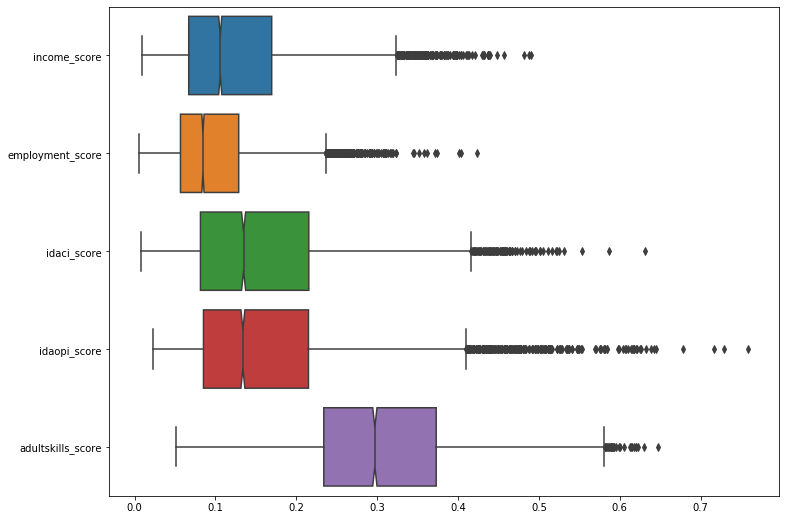

interactive(children=(Dropdown(description='variable', options=('income_score', 'employment_score', 'idaci_sco…

                       mean      skew  kurtosis
adultskills_score  0.306442  0.333112 -0.188901
idaci_score        0.157787  0.943285  0.444283
income_score       0.127742  1.141483  0.968041
employment_score   0.099709  1.230216  1.541439
idaopi_score       0.164520  1.394213  2.114016
                       mean      skew  kurtosis
adultskills_score  0.306442  0.333112 -0.188901
idaci_score        0.157787  0.943285  0.444283
income_score       0.127742  1.141483  0.968041
employment_score   0.099709  1.230216  1.541439
idaopi_score       0.164520  1.394213  2.114016


In [15]:
soc_econ1 = transform_and_plot('income_score', 'adultskills_score', 'soc_econ1_b4_transform.jpg', power=0, log=0, stand=0, remove=[
                               'education_score', 'housebar_score', 'livenv_score', 'health_score', 'crime_score', 'chanyp_score'])

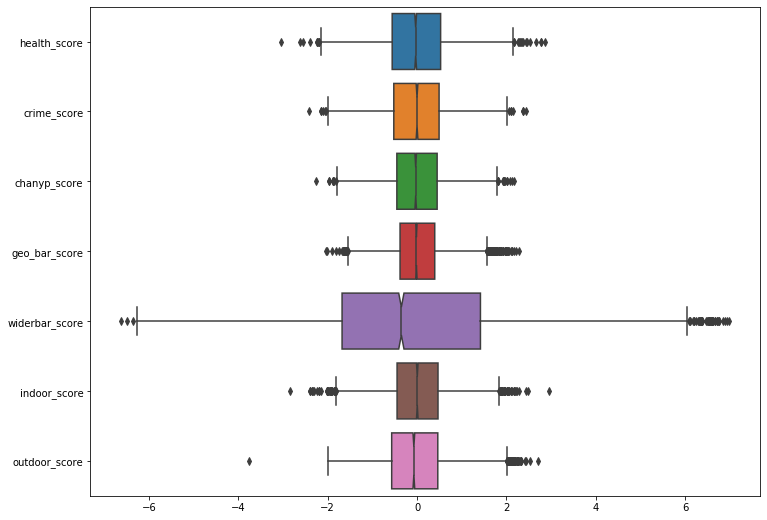

interactive(children=(Dropdown(description='variable', options=('health_score', 'crime_score', 'chanyp_score',…

                   mean      skew  kurtosis
indoor_score   0.011994  0.021628  0.207650
crime_score   -0.004306  0.040719 -0.341164
chanyp_score  -0.002779  0.054708 -0.235483
health_score  -0.007699  0.101557 -0.202080
geo_bar_score  0.013912  0.245297  0.250996
                    mean      skew  kurtosis
chanyp_score   -0.002779  0.054708 -0.235483
health_score   -0.007699  0.101557 -0.202080
geo_bar_score   0.013912  0.245297  0.250996
outdoor_score  -0.008452  0.382974 -0.046612
widerbar_score -0.024370  0.457845 -0.152780


In [16]:
soc_econ2 = transform_and_plot('health_score', 'outdoor_score', 'soc_econ2_transformed.jpg', power=0, log=0, stand=0, remove=[
                               'housebar_score', 'livenv_score', 'idaci_score', 'idaopi_score', 'adultskills_score'])

#### Population & Income Features

>100% of features appeared to be positively skewed with no negative or zero values. A logarithmic transformation followed by a 'box-cox' power transformation was used to address the skewness and some outliers.

>1. `total_netafterhsing` was the most normally distributed
>2. `workingage_pop` distribution was the most skewed

[-3.73201136  1.60304103 -3.17780497  4.21741151 -3.71640922 -2.44966322
 -2.03130748 -2.25975833  2.29886063]


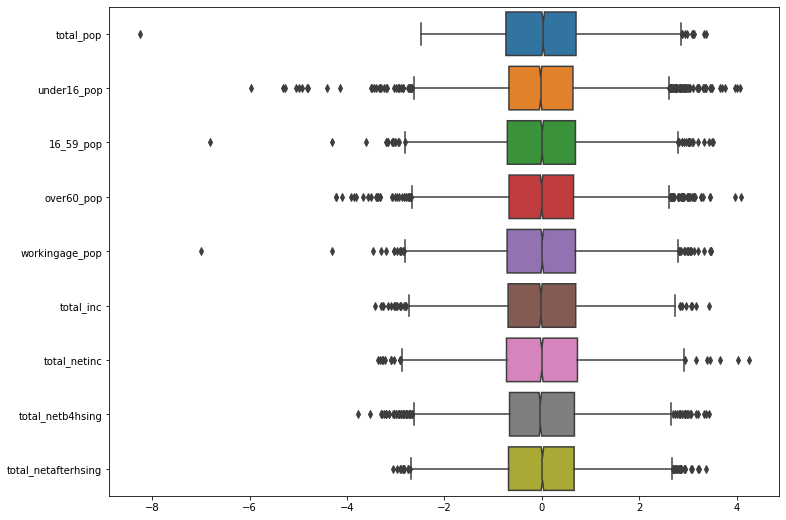

interactive(children=(Dropdown(description='variable', options=('total_pop', 'under16_pop', '16_59_pop', 'over…

                             mean      skew  kurtosis
16_59_pop           -2.666297e-12 -0.002888  0.151456
workingage_pop      -7.598436e-13 -0.002769  0.152477
total_netafterhsing -2.081353e-15 -0.002326 -0.125480
total_pop            2.394565e-12 -0.001242  0.186624
total_netb4hsing    -5.768024e-14 -0.000684  0.055449
                          mean      skew  kurtosis
total_netb4hsing -5.768024e-14 -0.000684  0.055449
total_netinc     -4.068790e-14  0.002612 -0.186843
total_inc         6.908413e-13  0.003586 -0.184782
over60_pop        1.470379e-16  0.024498  0.279246
under16_pop      -2.612155e-16  0.028331  1.057499


In [17]:
population = transform_and_plot(
    'total_pop', 'total_netafterhsing', 'pop_income_transformed.jpg', power=1, log=1)

#### Transportation Features

>100% of features appeared to be positively skewed with no negative values but with zero values. Features were aggregated together because of simulatrity and a logarithmic transformation followed by a 'box-cox' power transformation was used to address the skewness and some outliers.

>1. `cardriver_friends` was the most normally distributed
>2. `rail_work` distribution was the most skewed

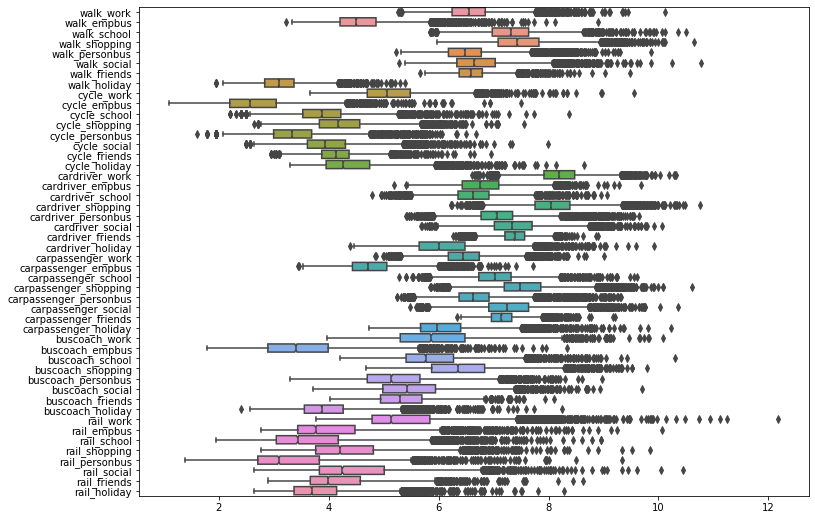

interactive(children=(Dropdown(description='variable', options=('walk_work', 'walk_empbus', 'walk_school', 'wa…

                         mean      skew  kurtosis
cardriver_friends    7.378373 -0.183227  0.961577
cardriver_school     6.633505  0.203591  1.631806
cardriver_work       8.207070  0.237449  0.772718
carpassenger_school  7.028275  0.289583  1.248643
walk_school          7.313802  0.366192  1.362766
                          mean      skew  kurtosis
carpassenger_holiday  6.103534  1.211658  2.277563
cycle_holiday         4.412167  1.245737  2.120667
rail_holiday          3.813595  1.290434  2.875698
rail_work             5.487356  1.318823  1.484525
rail_empbus           4.031474  1.528263  3.199432


In [18]:
transport = transform_and_plot('walk_to_work', 'rail_from_holiday_nhb',
                               "transport_transformed.jpg", power=0, log=1, aggreg=1)

#### Car Ownership & Registration Features

>100% of features appeared to be positively skewed with no negative values but with zero values. A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

[0.71571403 1.29070658 5.57162782 3.27447594 5.76665571 0.20127083
 0.1721904  0.13493236 0.1082534  0.08579442 0.07569379 0.0713761
 0.07417061 0.05615328 0.04932115 0.04186037 0.05215098 0.05987834
 0.05720915 0.06490561 0.08858778 0.07493289 0.13413085 0.12916797
 0.16396138 0.15574249 0.11590847 0.0926311  0.07037547 0.07663436
 0.04857366 0.05549839 0.02349708 0.03427618 0.07722899 0.08755486]


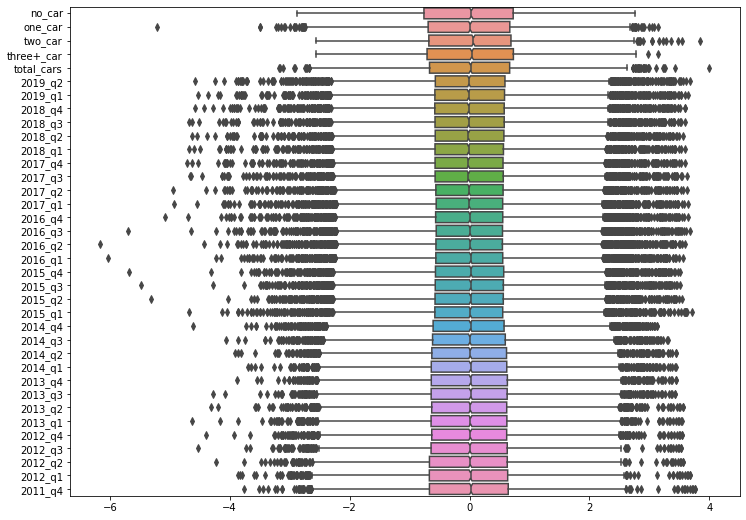

interactive(children=(Dropdown(description='variable', options=('no_car', 'one_car', 'two_car', 'three+_car', …

                    mean      skew  kurtosis
three+_car  2.862613e-16 -0.100272 -0.482193
two_car    -3.266420e-17 -0.074637 -0.247935
no_car      1.330992e-15 -0.016730 -0.662092
total_cars -2.099141e-17 -0.011257 -0.068076
one_car     4.649171e-16  0.000044 -0.008985
                 mean      skew  kurtosis
2014_q3  1.961814e-17  0.011940  0.516306
2018_q4  5.826259e-16  0.013664  1.185963
2019_q1  2.449488e-16  0.016194  1.116000
2019_q2 -2.823050e-16  0.017778  1.067796
2015_q1 -3.616276e-17  0.018602  1.078132


In [19]:
car_ownreg = transform_and_plot('no_car', 'growth', 'car_own_transformed.jpg',
                                log=1, power=1, stand=0, remove=['two_car_tot', 'growth', 'two_car_frac'])

#### Geo-Spatial Features

>100% of features appeared to be positively skewed with no negative values but with zero values. A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

>1. `num_supermarkets` was the most normally distributed (number of supermarkets in a MSOA) 
>2. `num_parking` was the most skewed distribution (number of car parks in a MSOA)

Note all these geo-spatial distributions have simular shapes to the target variable distribution

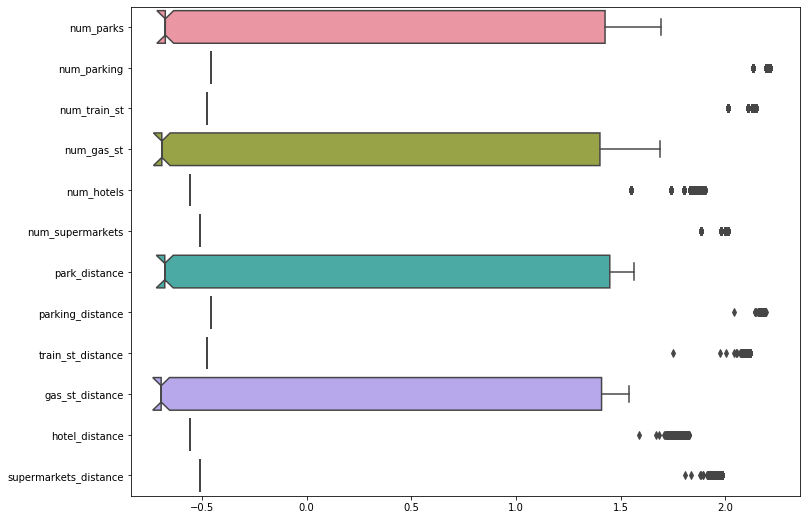

interactive(children=(Dropdown(description='variable', options=('num_parks', 'num_parking', 'num_train_st', 'n…

                         mean      skew  kurtosis
gas_st_distance -3.397207e-17  0.746665 -1.439158
num_gas_st       2.480713e-16  0.774435 -1.361356
park_distance   -6.291863e-16  0.800310 -1.357136
num_parks       -3.563961e-18  0.823527 -1.289763
hotel_distance   2.890732e-16  1.235161 -0.473946
                           mean      skew  kurtosis
num_supermarkets  -2.099141e-17  1.458327  0.129884
train_st_distance  4.322529e-16  1.632210  0.664502
num_train_st       3.601563e-17  1.633689  0.671810
parking_distance  -8.609256e-16  1.725157  0.976518
num_parking       -4.973361e-16  1.725860  0.980164


In [20]:
geo_spatial = transform_and_plot(
    'num_parks', 'supermarkets_distance', 'geo_spatial_transformed.jpg', power=1, log=1)

#### Electricity Consumption Features

>100% of features appeared to be positively skewed with no negative values but with zero values. A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

>1. `elec_nd_con_mean` was the most normally distributed (mean non-domestic electricity consumption in a MSOA) 
>2. `elec_nd_con` was the most skewed distribution (non-domestic electricity consumption in a MSOA)

[ -7.70132802  -3.95032256 -14.54883646  -7.05203363   1.05924992
   1.12625862   6.91311397   1.89854933   1.02953339  -0.03071753
   0.13611556]


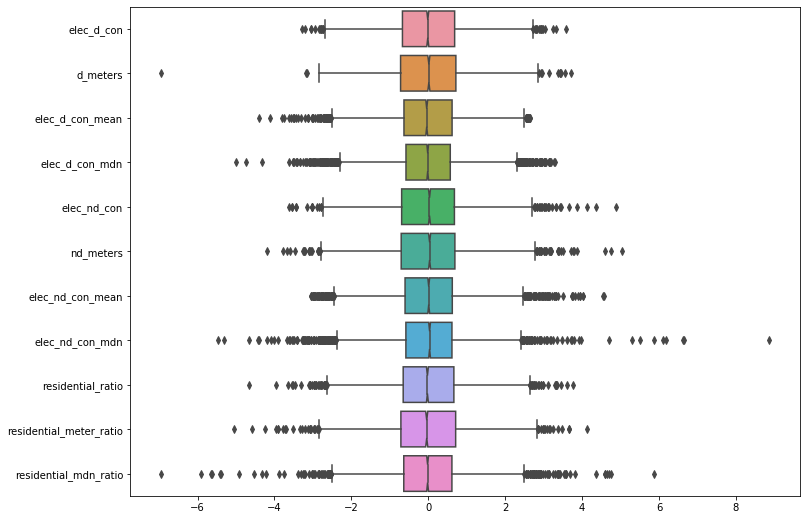

interactive(children=(Dropdown(description='variable', options=('elec_d_con', 'd_meters', 'elec_d_con_mean', '…

                                 mean      skew  kurtosis
elec_d_con_mdn          -1.759704e-09 -0.029134  0.725816
residential_meter_ratio  7.563118e-16 -0.001102  0.162395
elec_nd_con             -6.030942e-16  0.001002  0.073441
residential_ratio       -1.058071e-15  0.003142  0.141516
d_meters                 6.670640e-12  0.003773 -0.046287
                               mean      skew  kurtosis
elec_d_con_mean        6.419621e-03  0.008929  0.197888
elec_d_con             6.633671e-07  0.010404 -0.243971
residential_mdn_ratio -2.599015e-16  0.023239  1.857108
elec_nd_con_mean       1.329047e-16  0.044235  0.667563
elec_nd_con_mdn        1.169650e-15  0.052949  3.174558


In [21]:
electricity = transform_and_plot(
    'elec_d_con', 'residential_mdn_ratio', 'electricity_transformed.jpg', log=1, power=1)

In [22]:
trans_df = pd.concat([soc_econ1, soc_econ2, population, transport, car_ownreg,
                      geo_spatial, electricity, df.loc[:, 'metropolitan':]], axis=1)
trans_df.head()

,income_score,employment_score,idaci_score,idaopi_score,adultskills_score,health_score,crime_score,chanyp_score,geo_bar_score,widerbar_score,...,nd_meters,elec_nd_con_mean,elec_nd_con_mdn,residential_ratio,residential_meter_ratio,residential_mdn_ratio,metropolitan,charge_points,charge_pt_cbrt,charge_pt_log
0,0.11300,0.0716,0.2286,0.33860,0.11400,0.3630,0.80880,-0.04220,-0.90100,3.11860,...,0.197921,-2.841671,-2.338393,-1.257011,0.162572,1.235550,1,1.0,1.0,0.693147
1,0.18525,0.1385,0.1935,0.24425,0.39825,0.7670,0.68000,0.51950,0.58775,-0.09675,...,-0.143319,-0.200073,-0.517636,-0.544830,-0.100296,0.118798,0,0.0,0.0,0.000000
2,0.10650,0.0965,0.1540,0.09900,0.35675,-0.0575,0.65925,-0.19225,0.33675,-0.51000,...,-0.332959,1.274794,1.292622,0.339985,0.095846,-1.692076,1,0.0,0.0,0.000000
3,0.20160,0.1838,0.2622,0.17240,0.45460,0.7454,0.17780,1.23600,0.36240,-0.24380,...,-0.535777,2.636012,1.338312,1.087951,0.655943,-1.574221,0,0.0,0.0,0.000000
4,0.29640,0.2324,0.3658,0.33180,0.42360,1.7044,-0.06740,0.81980,-0.77440,-0.74060,...,-1.263597,-0.004359,0.586896,1.333457,1.292716,-1.029627,1,0.0,0.0,0.000000


In [ ]:
new_columns = []
old_columns = []
for x in range(0, 180, 2):
    two_variables = df.iloc[:, x+28:x+30].columns
    old_columns.extend(two_variables)

    mode = two_variables[0].split("_")[0]
    if two_variables[0].split("_")[-1] == 'nhb':
        activity = "_".join([two_variables[0].split(
            "_")[-2], two_variables[0].split("_")[-1]])
    else:
        activity = two_variables[0].split("_")[-1]
    new_columns.append(f'{mode}_{activity}')
    # print(df.iloc[:,x+28:x+30].columns[0].split("_")[-1])
    df[f'{mode}_{activity}'] = df.iloc[:, x+28:x+30].sum(axis=1)

#old_columns = []
for x in range(-90, 0):
    first = df.iloc[:, x].name
    second = df.iloc[:, x+8].name
    if first.split("_")[0] == second.split("_")[0]:
        df[first] = df[first]+df[second]
        old_columns.append(second)
        # print(first,second)

df = df.drop(old_columns, axis=1)
df.iloc[:, -48:]
#df[f'transport{x}'] = df.iloc[:,28:30].sum(axis=1)

In [23]:
mode = ['walk', 'cycle', 'cardriver', 'carpassenger', 'buscoach', 'rail']
activities = ['work', 'empbus', 'school', 'shopping',
              'personbus', 'social', 'friends', 'holiday']
direction = ['to', 'from']

### Correlation of Features with Target variable

In [24]:
def search_corr(variable_list, target_list, figsize, num):
    list1 = variable_list
    list2 = target_list
    matrix = pd.concat(
        [trans_df.loc[:, list1], trans_df.loc[:, list2]], axis=1).corr()
    mask = np.zeros_like(matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(round(matrix, 3), mask=mask, annot=True, cmap='winter')
    plt.ylim(num, 0)

    result = matrix[target_list]
    sort_list = result.charge_points.apply(
        lambda x: abs(x)).sort_values(ascending=False)[3:5].index
    print(matrix[target_list].loc[sort_list, :])
    return list(sort_list)


def just_plot(variable_list, target_list, figsize, num, filename):
    list1 = variable_list
    list2 = target_list
    matrix = pd.concat(
        [trans_df.loc[:, list1], trans_df.loc[:, list2]], axis=1).corr()
    mask = np.zeros_like(matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=figsize)
    sns.heatmap(round(matrix, 3), mask=mask, annot=True, cmap='winter')
    plt.ylim(num, 0)
    plt.savefig("../reports/figures/"+filename)

In [25]:
feat_list = []

#### SocioEconomic Feature correlations

There was a low correlation of socio-economic features with the number of EV charge points in a MSOA

> 1. The **top 3** correlated features were `workingage_pop`, `16_59_pop` and `widerbar_score` 

> 2. There was high intercorrelation between the `workingage_pop` and `16_59_pop` as expected as the working age population tends to be between the age of 16 - 59.

                charge_points  charge_pt_cbrt  charge_pt_log
workingage_pop       0.223045        0.252298       0.260340
16_59_pop            0.219612        0.246830       0.255275


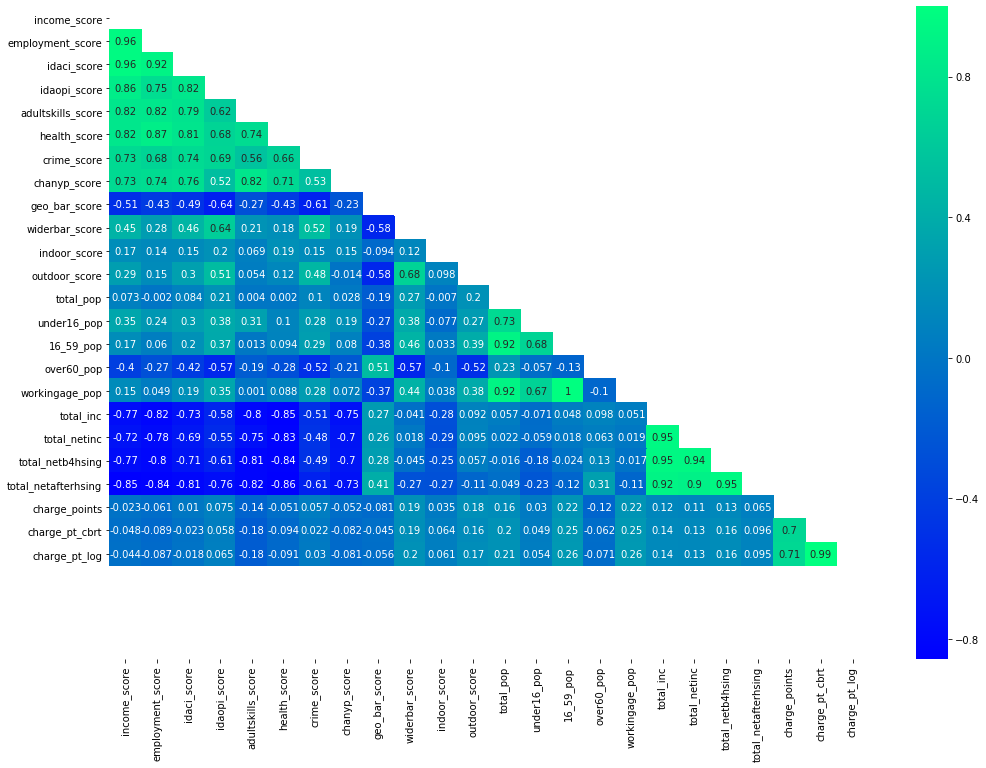

In [26]:
soc_econ_list = trans_df.loc[:, 'income_score':'total_netafterhsing'].columns
targets_list = ['charge_points', 'charge_pt_cbrt', 'charge_pt_log']

feat_list.extend(search_corr(soc_econ_list, targets_list, (17, 12), 28))

#### Transportation Feature correlations
There was a mildly low correlation of transportation features with the number of EV charge points in a MSOA

The **top 3** correlated features for each mode of transport were as follows:<br>
> 1. **walking to/from a social event, work or to conduct employers business:**<br>
`walk_empbus`, `walk_social` and `walk_work` <br><br>
> - **cycling to/from a social event, work or to conduct employers business:**<br>
`cycle_empbus`, `cycle_social`, `cycle_work` <br><br>
> - **driving alone to/from a social event, work or to conduct employers business:**<br>
`cardriver_empbus`, `cardriver_social`,`cardriver_work` <br><br>
> - **driving with passengers to/from a social event, work or to conduct employers business:**<br>
`carpassenger_empbus`, `carpassenger_social`, `carpassenger_work` <br><br>
> - **taking the bus to/from a social event, work or to conduct employers business:**<br>
`buscoach_empbus` `buscoach_social` `buscoach_work` <br><br>
> - **taking the train to/from a social event, shopping or to conduct employers business:**<br>
`rail_empbus` `rail_social` `rail_shopping` <br><br>

**EV chargepoint locations overall tend to be located in places where there is large amount of journeys for social events, work and conducting employers business**

In [27]:
# shopping = 3, social = 7, personal_business = 1, employers_business = 5, work = 2
# home = 5, non-home-based = 13

             charge_points  charge_pt_cbrt  charge_pt_log
walk_empbus       0.358782        0.398504       0.406999
walk_social       0.321909        0.366446       0.372621
              charge_points  charge_pt_cbrt  charge_pt_log
cycle_empbus       0.364267        0.412226       0.422236
cycle_social       0.351613        0.416161       0.421656
                  charge_points  charge_pt_cbrt  charge_pt_log
cardriver_empbus       0.327987        0.428622       0.427373
cardriver_social       0.249793        0.323348       0.322329
                      charge_points  charge_pt_cbrt  charge_pt_log
carpassenger_empbus        0.354552        0.440697       0.441481
carpassenger_holiday       0.199263        0.250581       0.244899
                 charge_points  charge_pt_cbrt  charge_pt_log
buscoach_empbus       0.362391        0.379151       0.391210
buscoach_social       0.338631        0.362546       0.373363
               charge_points  charge_pt_cbrt  charge_pt_log
rail_empbus  

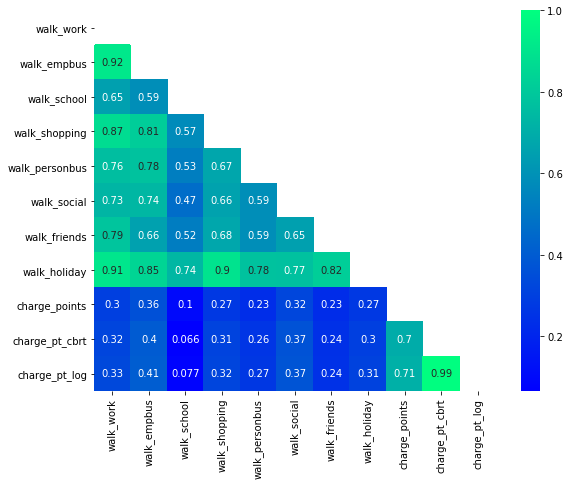

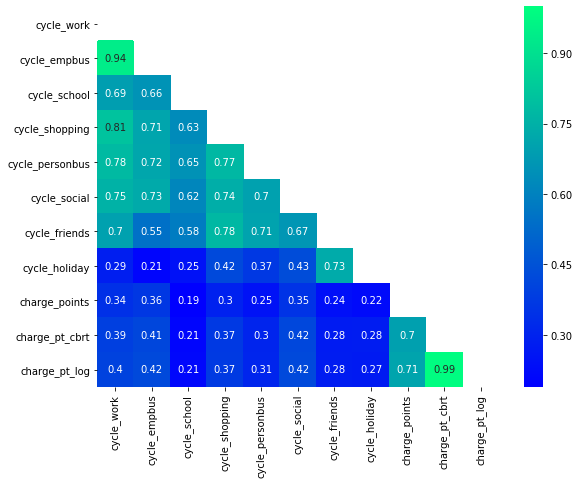

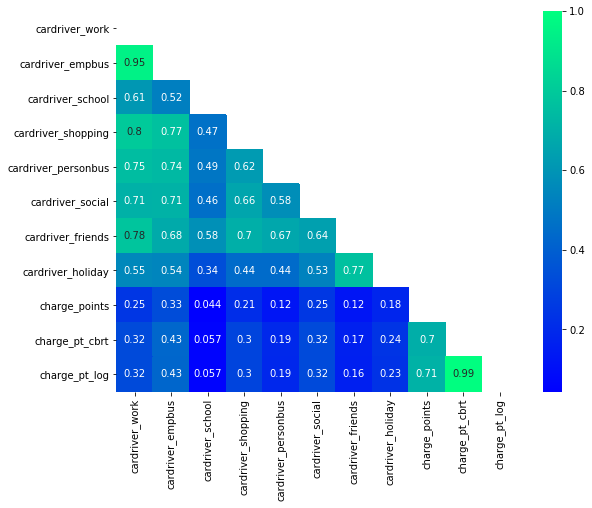

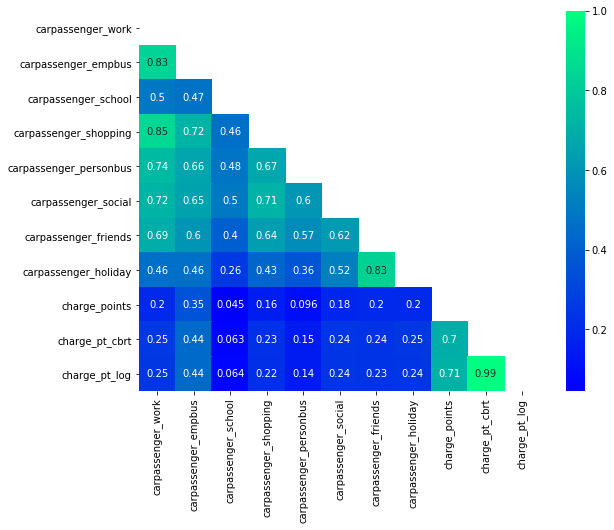

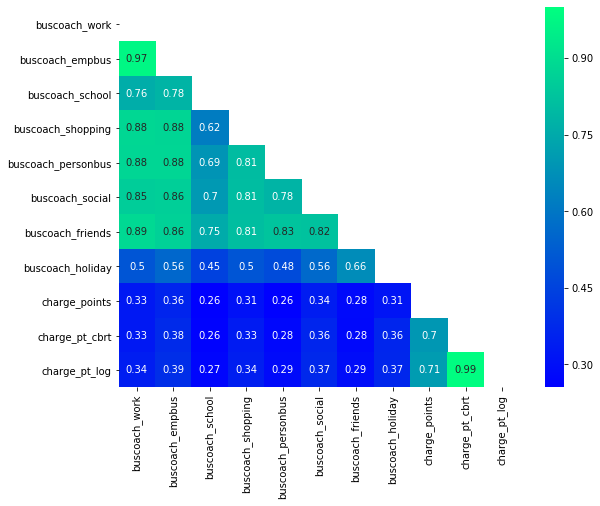

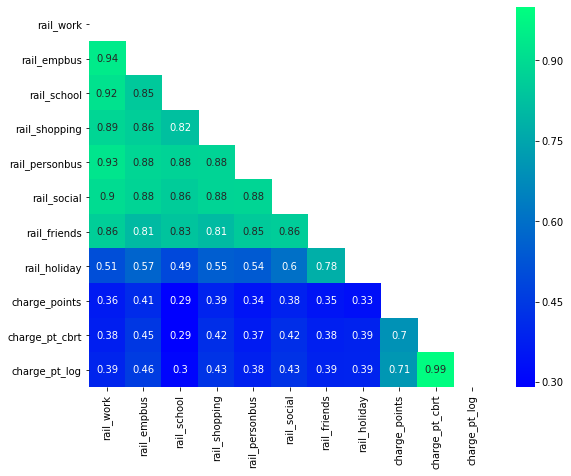

In [28]:
mode = ['walk', 'cycle', 'cardriver', 'carpassenger', 'buscoach', 'rail']

for num, x in enumerate(mode):
    transp_list = trans_df.loc[:, f'{x}_work':f'{x}_holiday'].columns
    feat_list.extend(search_corr(transp_list, targets_list, (9, 7), 11))

#### Car Ownership Feature correlations

There was a low correlation of car ownership features with the number of EV charge points in a MSOA

The **top 3** correlated features for car ownership were as follows:<br>

> 1. **no car ownership and EV car ownership for 2019 quarter 1 and 2018 quarter 3:**<br>
`no_car`, `2019_q1` and `2018_q3` <br>
> 2. There was high intercorrelation between the `2019_q1` and `2018_q3` this may have a time dependence.

            charge_points  charge_pt_cbrt  charge_pt_log
no_car           0.181068        0.179904       0.189843
three+_car      -0.116794       -0.079967      -0.091352


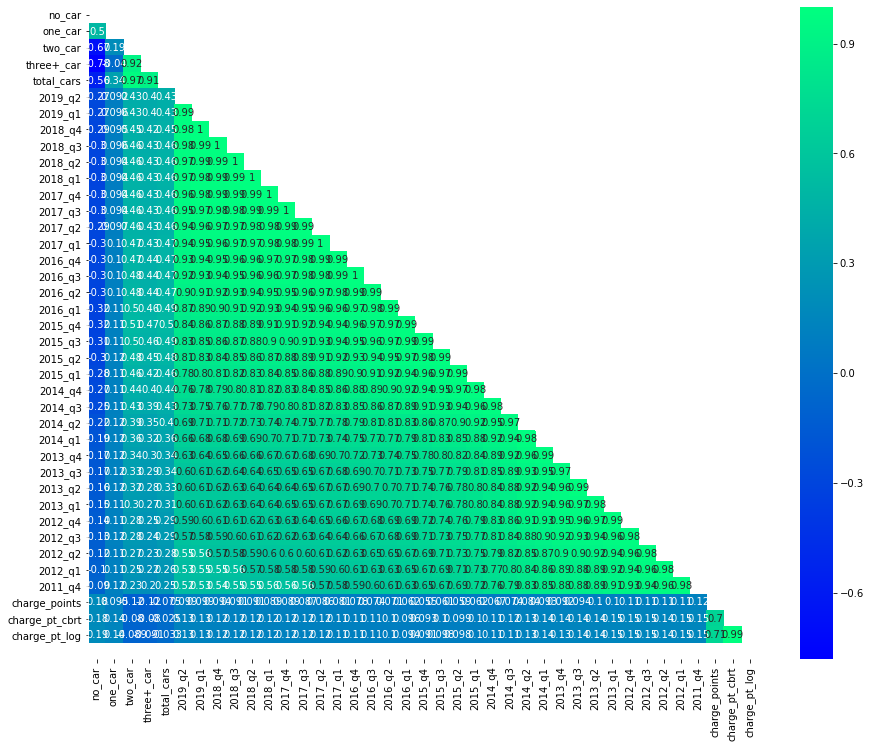

In [29]:
cars_list = trans_df.loc[:, 'no_car':'2011_q4'].columns
feat_list.extend(search_corr(cars_list, targets_list, (15, 12), 40))

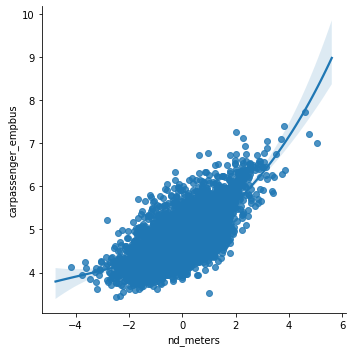

In [44]:
sns.lmplot('nd_meters', 'carpassenger_empbus', data=trans_df, order=3)
plt.xscale('linear')

#### Geo-Spatial Feature correlations
There was a low correlation of geo-spatial features with the number of EV charge points in a MSOA

The **top 3** correlated features for geo-spatial features were as follows:<br>

> 1. **Number of car parking lots, train stations and gas/service stations**<br>
`num_parking`, `num_train_st` and `num_gas_st` <br>
> 2. There was medium intercorrelation between the `num_parking` and `num_train_st` as there are some car park facilities that exist for "park and ride".

                   charge_points  charge_pt_cbrt  charge_pt_log
num_train_st            0.214790        0.229701       0.235052
train_st_distance       0.212601        0.227968       0.233253


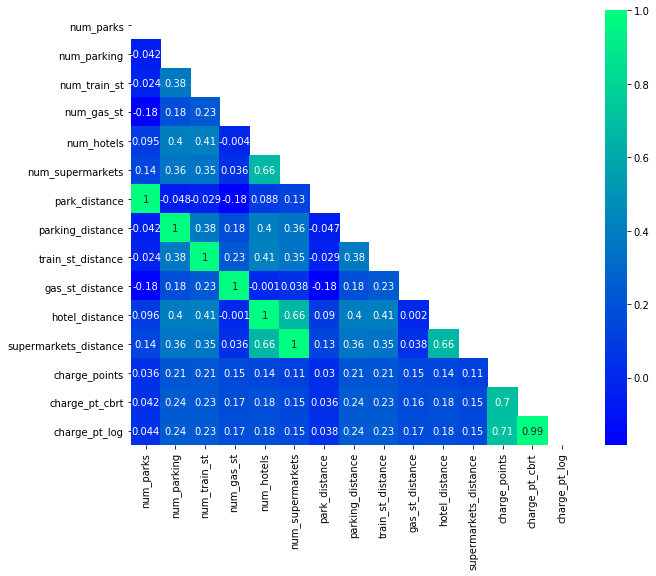

In [31]:
geo_list = trans_df.loc[:, 'num_parks':'supermarkets_distance'].columns
feat_list.extend(search_corr(geo_list, targets_list, (10, 8), 15))

#### Electricity Consumption Feature correlations
There was a low correlation of electricity consumption features with the number of EV charge points in a MSOA

The **top 3** correlated features for electricity consumption were as follows:<br>

> 1. **Non-domestic electiricty consumption rates and the number of domestic and non-domestic electricity meters**<br>
`elec_nd_con`, `nd_meters` and `d_meters` <br>
> 2. There was high intercorrelation between the `elec_nd_con` and `nd_meters` as expected due to high non domestic electricity consumption when there are high numbers of meters

             charge_points  charge_pt_cbrt  charge_pt_log
nd_meters         0.322266        0.449971       0.447040
elec_nd_con       0.308504        0.442152       0.439151


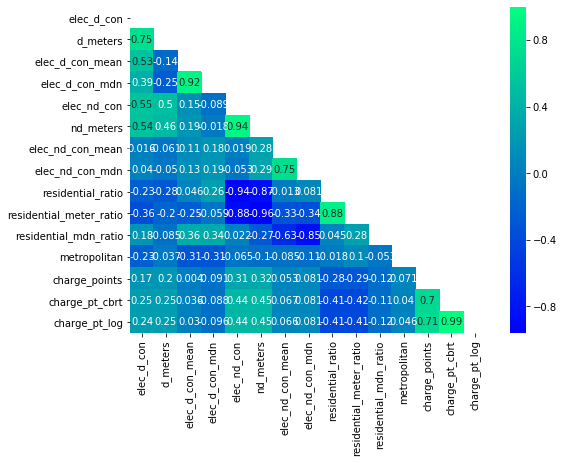

In [32]:
electricity_list = trans_df.loc[:, 'elec_d_con':'metropolitan'].columns
feat_list.extend(search_corr(electricity_list, targets_list, (8, 6), 15))

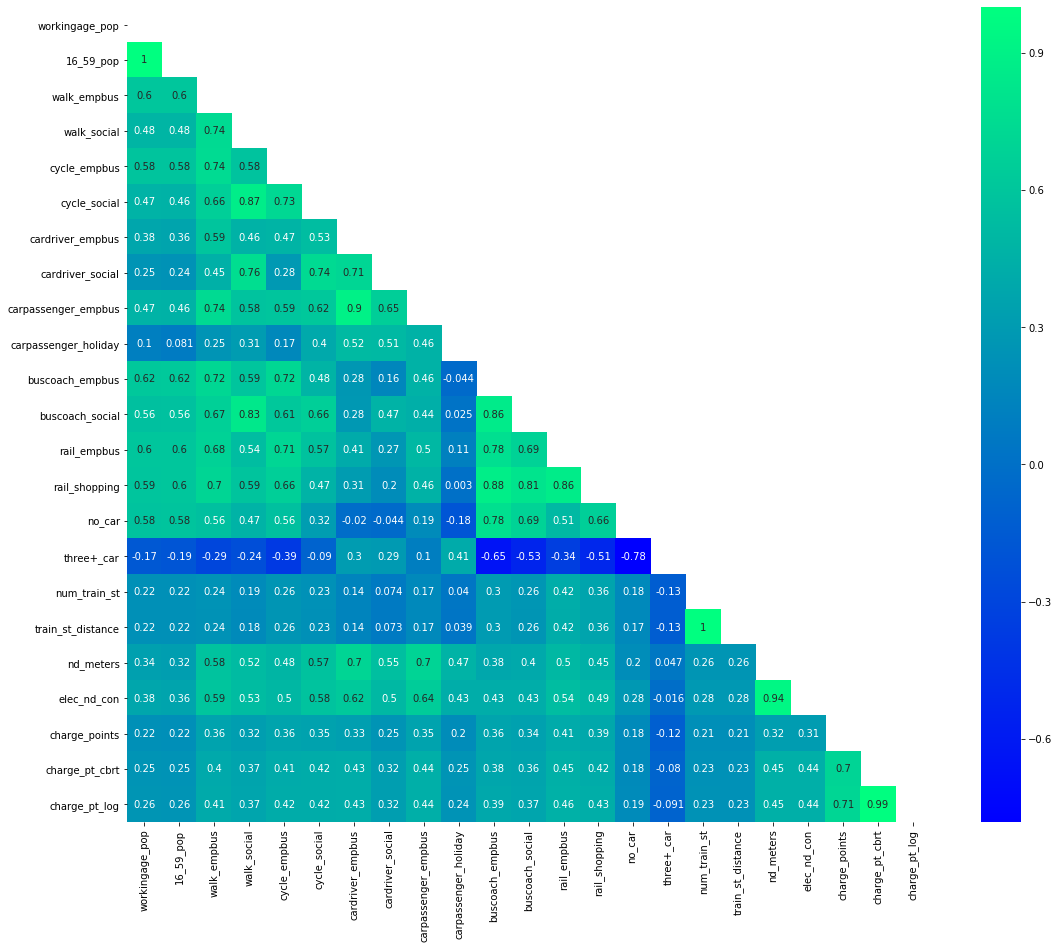

In [33]:
just_plot(feat_list, targets_list, (18, 15), 23, "EVcorrheatmap.jpg")

In [34]:
trans_df.drop(['charge_pt_log', 'charge_pt_cbrt',
               'charge_points'], axis=1).shape

(6791, 129)

In [35]:
trans_df

,income_score,employment_score,idaci_score,idaopi_score,adultskills_score,health_score,crime_score,chanyp_score,geo_bar_score,widerbar_score,...,nd_meters,elec_nd_con_mean,elec_nd_con_mdn,residential_ratio,residential_meter_ratio,residential_mdn_ratio,metropolitan,charge_points,charge_pt_cbrt,charge_pt_log
0,0.11300,0.07160,0.22860,0.33860,0.114000,0.36300,0.808800,-0.042200,-0.901000,3.118600,...,0.197921,-2.841671,-2.338393,-1.257011,0.162572,1.235550,1,1.0,1.000000,0.693147
1,0.18525,0.13850,0.19350,0.24425,0.398250,0.76700,0.680000,0.519500,0.587750,-0.096750,...,-0.143319,-0.200073,-0.517636,-0.544830,-0.100296,0.118798,0,0.0,0.000000,0.000000
2,0.10650,0.09650,0.15400,0.09900,0.356750,-0.05750,0.659250,-0.192250,0.336750,-0.510000,...,-0.332959,1.274794,1.292622,0.339985,0.095846,-1.692076,1,0.0,0.000000,0.000000
3,0.20160,0.18380,0.26220,0.17240,0.454600,0.74540,0.177800,1.236000,0.362400,-0.243800,...,-0.535777,2.636012,1.338312,1.087951,0.655943,-1.574221,0,0.0,0.000000,0.000000
4,0.29640,0.23240,0.36580,0.33180,0.423600,1.70440,-0.067400,0.819800,-0.774400,-0.740600,...,-1.263597,-0.004359,0.586896,1.333457,1.292716,-1.029627,1,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6786,0.07180,0.05260,0.08240,0.14740,0.139000,-1.24560,0.454600,-0.808200,-1.326600,3.130200,...,2.176187,-0.949203,-0.623518,-2.087123,-1.839316,0.219137,1,15.0,2.466212,2.772589
6787,0.17275,0.14025,0.18925,0.23475,0.389750,0.85050,0.381250,0.570500,0.216750,0.193250,...,0.064665,-0.486247,-0.258531,-0.570445,-0.126837,-0.229281,1,0.0,0.000000,0.000000
6788,0.09750,0.07250,0.14000,0.10500,0.236333,-0.54450,-0.181333,-0.217833,0.846167,-0.151833,...,0.818017,0.063778,0.333705,-0.497688,-0.829273,0.065908,0,3.0,1.442250,1.386294
6789,0.10825,0.10200,0.13000,0.12250,0.230000,0.41000,0.467500,-0.508250,0.121500,-3.466000,...,-1.554089,-1.568906,1.438213,2.140363,1.369444,-1.145527,0,0.0,0.000000,0.000000


In [36]:
from sklearn.linear_model import LinearRegression, LogisticRegression
pd.set_option('display.max_columns', 5000)
trans_df = trans_df.dropna()
X = trans_df.drop(['charge_pt_log', 'charge_pt_cbrt', 'charge_points'], axis=1)
y = trans_df.charge_pt_log.values
model = LinearRegression()
model.fit(X, y)
print(model.score(X, y))
pd.DataFrame(model.coef_, index=X.columns, columns=['coef']).apply(
    lambda x: abs(x)).sort_values(by='coef', ascending=False).head(40)

0.3771224056041563


,coef
elec_nd_con,4.492176
nd_meters,2.034609
num_parking,1.929882
parking_distance,1.903075
residential_ratio,1.481752
adultskills_score,1.004833
residential_meter_ratio,0.756893
employment_score,0.733912
elec_nd_con_mdn,0.601764
cardriver_empbus,0.598274


In [37]:
from sklearn.metrics import r2_score,mean_squared_error

np.sqrt(mean_squared_error(y,model.predict(X)))


0.762120755327261

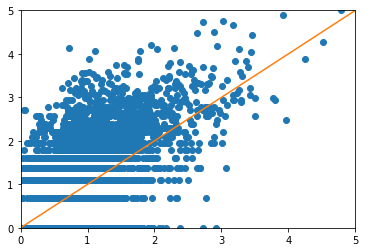

In [38]:
plt.plot(model.predict(X),y,'o')
plt.plot([0,5],[0,5])
plt.ylim(0,5)
plt.xlim(0,5);

In [39]:
pd.set_option('display.max_columns', 5000)
trans_df = trans_df.dropna()
X = trans_df.drop(['charge_pt_log', 'charge_pt_cbrt', 'charge_points'], axis=1)
X = trans_df[['indoor_score','adultskills_score','cardriver_empbus','cycle_social','buscoach_empbus','num_parking','elec_nd_con','walk_empbus','residential_ratio','nd_meters']]#,buscoach_empbus','walk_work']]
#X = trans_df[['rail_shopping']]
y = trans_df.charge_points.apply(lambda x: 1 if x > 0 else 0).values
model = LogisticRegression(solver='liblinear')
model.fit(X, y)
print(model.score(X, y))
coef_table = pd.DataFrame(model.coef_[0], index=X.columns, columns=['coef'])
coef_table['abs_coef'] = coef_table.coef.apply(lambda x: abs(x))
coef_table.sort_values(by='abs_coef', ascending=False).head(40)

0.7131497570313651


,coef,abs_coef
adultskills_score,-2.287865,2.287865
cardriver_empbus,0.817018,0.817018
buscoach_empbus,0.578659,0.578659
walk_empbus,-0.578259,0.578259
nd_meters,0.379015,0.379015
cycle_social,0.369521,0.369521
residential_ratio,-0.225068,0.225068
indoor_score,-0.202885,0.202885
num_parking,0.109108,0.109108
elec_nd_con,0.093657,0.093657
